In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.3f}'.format

In [3]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['Walmart (1).csv']))
print(df.head())

Saving Walmart.csv to Walmart (1).csv
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010   1643690.900             0       42.310       2.572   
1      1  12-02-2010   1641957.440             1       38.510       2.548   
2      1  19-02-2010   1611968.170             0       39.930       2.514   
3      1  26-02-2010   1409727.590             0       46.630       2.561   
4      1  05-03-2010   1554806.680             0       46.500       2.625   

      CPI  Unemployment  
0 211.096         8.106  
1 211.242         8.106  
2 211.289         8.106  
3 211.320         8.106  
4 211.350         8.106  


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.000,23.000,12.988,1.000,12.000,23.000,34.000,45.000
Weekly_Sales,6435.000,1046964.878,564366.622,209986.250,553350.105,960746.040,1420158.660,3818686.450
Holiday_Flag,6435.000,0.070,0.255,0.000,0.000,0.000,0.000,1.000
Temperature,6435.000,60.664,18.445,-2.060,47.460,62.670,74.940,100.140
Fuel_Price,6435.000,3.359,0.459,2.472,2.933,3.445,3.735,4.468
CPI,6435.000,171.578,39.357,126.064,131.735,182.617,212.743,227.233
Unemployment,6435.000,7.999,1.876,3.879,6.891,7.874,8.622,14.313


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [12]:
# Features we want to use
features = ['Fuel_Price', 'Temperature', 'CPI', 'Unemployment', 'Holiday_Flag']

# X = feature matrix
X = df[features].values

# y = target vector
y = df[['Weekly_Sales']].values

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)


In [17]:
X_trainN, X_testN, y_trainN, y_testN = train_test_split(
    X_scaled, y_scaled, test_size=0.3, random_state=42)

X_train = torch.tensor(X_trainN, dtype=torch.float32)
y_train = torch.tensor(y_trainN, dtype=torch.float32)
X_test = torch.tensor(X_testN, dtype=torch.float32)
y_test = torch.tensor(y_testN, dtype=torch.float32)

In [18]:
n_features = X_train.shape[1]  # number of features
model = nn.Linear(n_features, 1)

In [19]:
model=nn.Linear(n_features, 1)

lr=0.5
n_epoch=1000

lossfunc=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(), lr=lr)
train_loss=[]
test_loss=[]


for epoch in range(n_epoch):
    y_pred=model(X_train)
    loss=lossfunc(y_train, y_pred)
    loss.backward()
    train_loss.append(loss.item())
    optimizer.step()
    optimizer.zero_grad()

    [w,b]=model.parameters()

    with torch.inference_mode():
        y_test_pred=model(X_test)
        lost_test=lossfunc(y_test, y_test_pred)
        test_loss.append(lost_test)


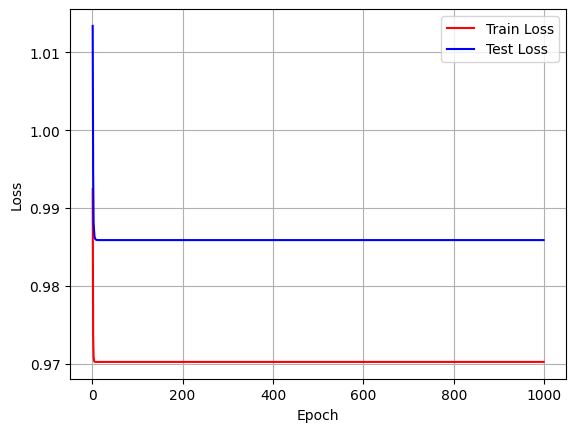

In [20]:
fig=plt.figure()
xv=np.arange(1, n_epoch,1)
plt.plot(xv,train_loss[1:], 'r', label="Train Loss")
plt.plot(xv,test_loss[:-1], 'b', label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
fig.show()

In [21]:
with torch.inference_mode():
    y_test_pred=model(X_test)
print('Coefficient of determination: %.2f' % r2_score(y_test, y_test_pred))

Coefficient of determination: 0.02


In [34]:
features = ['Fuel_Price', 'Temperature', 'CPI', 'Unemployment', 'Holiday_Flag']
X = df[features].values
y = df[['Weekly_Sales']].values

# Scale
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Train-test split
X_trainN, X_testN, y_trainN, y_testN = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

# Tensors
X_train = torch.tensor(X_trainN, dtype=torch.float32)
y_train = torch.tensor(y_trainN, dtype=torch.float32)
X_test = torch.tensor(X_testN, dtype=torch.float32)
y_test = torch.tensor(y_testN, dtype=torch.float32)

n_features = X_train.shape[1]
model = nn.Linear(n_features, 1)

# ------------------------
# Training setup
# ------------------------
lr = 0.01
n_epoch = 1000
lossfunc = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
train_loss = []
test_loss = []

# ------------------------
# Training loop
# ------------------------
for epoch in range(n_epoch):
    # Forward + backward on training set
    y_pred = model(X_train)
    loss = lossfunc(y_train, y_pred)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    train_loss.append(loss.item())

    # Evaluate on test set
    with torch.inference_mode():
        y_test_pred = model(X_test)
        loss_test = lossfunc(y_test, y_test_pred)
        test_loss.append(loss_test.item())

    if (epoch+1) % 100 == 0:
        print(f"Epoch {epoch+1}: Train Loss={loss.item():.6f}, Test Loss={loss_test.item():.6f}")



Epoch 100: Train Loss=0.987434, Test Loss=1.003089
Epoch 200: Train Loss=0.971279, Test Loss=0.985448
Epoch 300: Train Loss=0.970329, Test Loss=0.985225
Epoch 400: Train Loss=0.970227, Test Loss=0.985578
Epoch 500: Train Loss=0.970214, Test Loss=0.985757
Epoch 600: Train Loss=0.970213, Test Loss=0.985828
Epoch 700: Train Loss=0.970212, Test Loss=0.985854
Epoch 800: Train Loss=0.970212, Test Loss=0.985864
Epoch 900: Train Loss=0.970213, Test Loss=0.985867
Epoch 1000: Train Loss=0.970212, Test Loss=0.985868


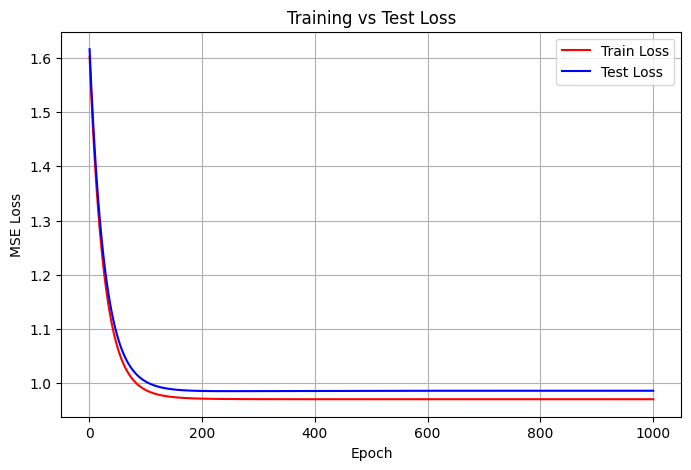

In [35]:

# Plot Train vs Test Loss

plt.figure(figsize=(8,5))
xv = np.arange(1, n_epoch+1)
plt.plot(xv, train_loss, 'r', label='Train Loss')
plt.plot(xv, test_loss, 'b', label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training vs Test Loss')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
with torch.inference_mode():
    y_test_pred=model(X_test)
print('Coefficient of determination: %.2f' % r2_score(y_test, y_test_pred))

Coefficient of determination: 0.02


Polynomial regression

In [23]:
features = ['Fuel_Price', 'Temperature', 'CPI', 'Unemployment', 'Holiday_Flag']
X = df[features].values
y = df['Weekly_Sales'].values



In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [29]:
degree = 3 # you can try 2 or 3
poly = PolynomialFeatures(degree=degree, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [30]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Polynomial Regression (degree={degree})")
print(f"R²: {r2:.3f}, Test RMSE: {rmse:.2f}")

Polynomial Regression (degree=3)
R²: 0.088, Test RMSE: 539972.34


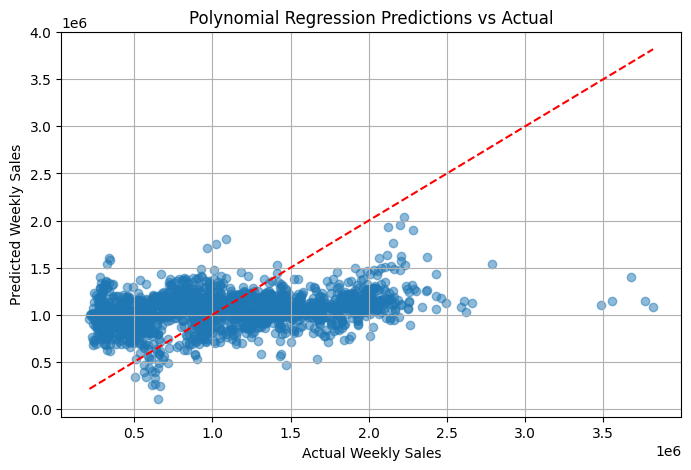

In [31]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Polynomial Regression Predictions vs Actual")
plt.grid(True)
plt.show()

In [14]:
regr = LinearRegression()
regr.fit(X_train, y_train)
pred = regr.predict(X_test)

print('Coefficient of determination: %.2f' % r2_score(y_test, pred))

Coefficient of determination: 0.02


In [37]:
# Add week
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Week'] = df['Date'].dt.isocalendar().week

# Include Store as categorical (one-hot)
features = ['Fuel_Price', 'Temperature', 'CPI', 'Unemployment', 'Holiday_Flag', 'Week']
df_encoded = pd.get_dummies(df[features + ['Store']], columns=['Store'], drop_first=True)

X = df_encoded.values
y = df[['Weekly_Sales']].values


In [38]:

# Scale
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split
X_trainN, X_testN, y_trainN, y_testN = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

# Tensors
X_train = torch.tensor(X_trainN, dtype=torch.float32)
y_train = torch.tensor(y_trainN, dtype=torch.float32)
X_test = torch.tensor(X_testN, dtype=torch.float32)
y_test = torch.tensor(y_testN, dtype=torch.float32)


In [39]:
n_features = X_train.shape[1]
model = nn.Linear(n_features, 1)

lr = 0.01
n_epoch = 1000
lossfunc = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
train_loss = []
test_loss = []

for epoch in range(n_epoch):
    y_pred = model(X_train)
    loss = lossfunc(y_train, y_pred)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    train_loss.append(loss.item())

    with torch.inference_mode():
        y_test_pred = model(X_test)
        loss_test = lossfunc(y_test, y_test_pred)
        test_loss.append(loss_test.item())

    if (epoch+1) % 100 == 0:
        print(f"Epoch {epoch+1}: Train Loss={loss.item():.6f}, Test Loss={loss_test.item():.6f}")


Epoch 100: Train Loss=0.116336, Test Loss=0.128099
Epoch 200: Train Loss=0.088289, Test Loss=0.100405
Epoch 300: Train Loss=0.085651, Test Loss=0.097423
Epoch 400: Train Loss=0.083782, Test Loss=0.095121
Epoch 500: Train Loss=0.082179, Test Loss=0.093115
Epoch 600: Train Loss=0.080792, Test Loss=0.091371
Epoch 700: Train Loss=0.079592, Test Loss=0.089857
Epoch 800: Train Loss=0.078552, Test Loss=0.088543
Epoch 900: Train Loss=0.077652, Test Loss=0.087404
Epoch 1000: Train Loss=0.076872, Test Loss=0.086415


In [40]:

with torch.inference_mode():
    y_test_pred_scaled = model(X_test)
    y_test_pred_orig = scaler_y.inverse_transform(y_test_pred_scaled.numpy())

r2 = r2_score(y_test, y_test_pred_scaled.numpy())
print(f"R² on test set (scaled): {r2:.3f}")


R² on test set (scaled): 0.914


In [32]:


# ----------- Select a single store----------------

store_id = 1  # you can change to 2,3,... depending on your data
subset = df[df['Store'] == store_id]

X = subset['Fuel_Price'].values.reshape(-1,1)
y = subset['Weekly_Sales'].values

# Scale the feature for stability
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------- Polynomial transformation----------------------
degree = 3
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X_scaled)

# -------------------- Fit model---------------------
model = LinearRegression()
model.fit(X_poly, y)

# ------------------------ Predict for plotting------------------

X_fit = np.linspace(X_scaled.min(), X_scaled.max(), 100).reshape(-1,1)
X_fit_poly = poly.transform(X_fit)
y_fit = model.predict(X_fit_poly)




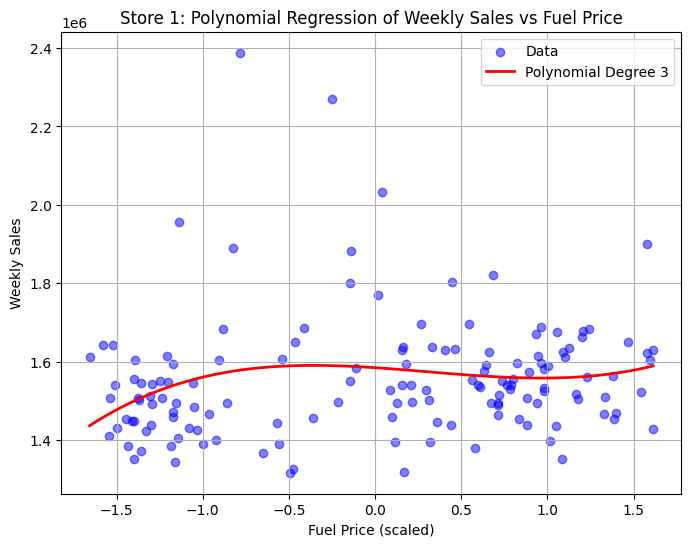

In [33]:
# ------------------------ Plot---------------------
plt.figure(figsize=(8,6))
plt.scatter(X_scaled, y, color='blue', alpha=0.5, label='Data')
plt.plot(X_fit, y_fit, color='red', linewidth=2, label=f'Polynomial Degree {degree}')
plt.xlabel('Fuel Price (scaled)')
plt.ylabel('Weekly Sales')
plt.title(f'Store {store_id}: Polynomial Regression of Weekly Sales vs Fuel Price')
plt.legend()
plt.grid(True)
plt.show()